## Correlation

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
import csv
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
           'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
           'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
           'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto']

In [5]:
# File name
#file_path = "../Data/"
file_path = '/content/drive/Othercomputers/Laptop/homework3/Data/'

df_by_region = {}

# Load data
for reg in regions:

  df_by_region[reg] = pd.read_csv(file_path + str(reg) + '.csv', 
                                   parse_dates = True)
  
  # Put date as index
  df_by_region[reg].set_index('data', inplace=True)


### Work on a single region at a time

In [34]:
region = "Molise"
df_reg = df_by_region[region]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3f240bb90>,
      dtype=object)

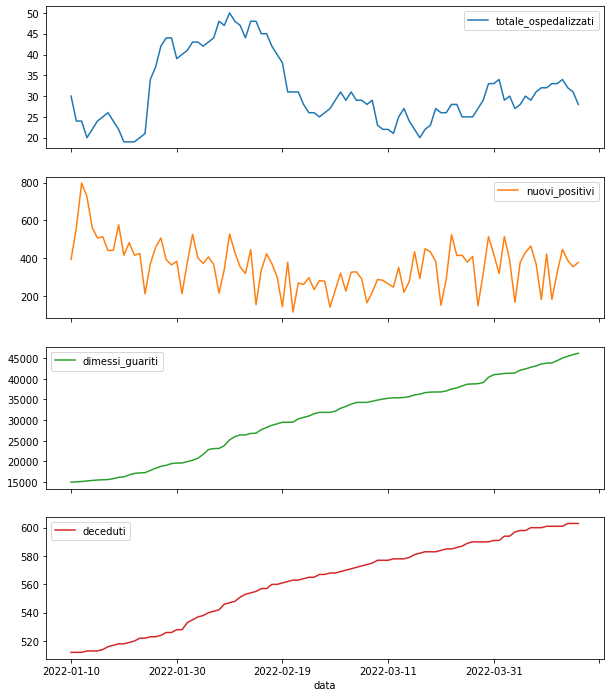

In [35]:
# Plot the evolution of the features
df_reg.plot(subplots=True, figsize=(10,12))

## Correlation
We can measure the correlation between pairs of series to measures how much two time series varies together. For two numerical variables, we can compute Peaeson's product moment coefficient as, 

<font size="3">
$
r_{xy} = \frac{\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{\sigma_x \sigma_y}
$
</font>

A high correlation means that the two series strongly vary together (when one increases, the other one also increases; when one decreases, the other one decreases as well). A low correlation means that they vary together but they is a weak association. Finally, a high negative correlation means that they vary in opposite directions but there is still a linear relationship.

In [8]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    

In [ ]:
g = sns.PairGrid(df_reg, aspect=1, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [31]:
pct_change = pd.DataFrame()

# ["Lombardia", "Veneto", "Piemonte", "Friuli Venezia Giulia", "Liguria", "Valle d'Aosta", "P.A. Bolzano", "P.A. Trento"]
#  ["Puglia", "Sicilia", "Calabria"]
# ['Campania', 'Basilicata', "Lazio", "Abruzzo"]

for reg in ['Campania', 'Basilicata', 'Lazio', 'Abruzzo', ]: 
  df_reg = df_by_region[reg]
  pct_change["totale_ospedalizzati_" + reg] = df_reg['totale_ospedalizzati'].pct_change()
  pct_change["nuovi_positivi_" + reg] = df_reg['nuovi_positivi'].pct_change()
  pct_change["dimessi_guariti_" + reg] = df_reg['dimessi_guariti'].pct_change()
  pct_change["deceduti_" + reg] = df_reg['deceduti'].pct_change()

In [10]:
from pandas.core.common import temp_setattr

In [32]:
confronto = pd.DataFrame()
for reg in ["Liguria", "P.A. Bolzano", "P.A. Trento"]:
  col = {'totale_ospedalizzati': "totale_ospedalizzati_" + reg,
        'nuovi_positivi': "nuovi_positivi_" + reg,
        'dimessi_guariti': "dimessi_guariti_" + reg,
        'deceduti': "deceduti_" + reg,
        }
  temp = df_by_region[reg]
  temp = temp.rename(columns = col)
  if confronto.shape[0] == 0:
    confronto = temp
  else:
    confronto = pd.concat([confronto, temp], axis=1)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

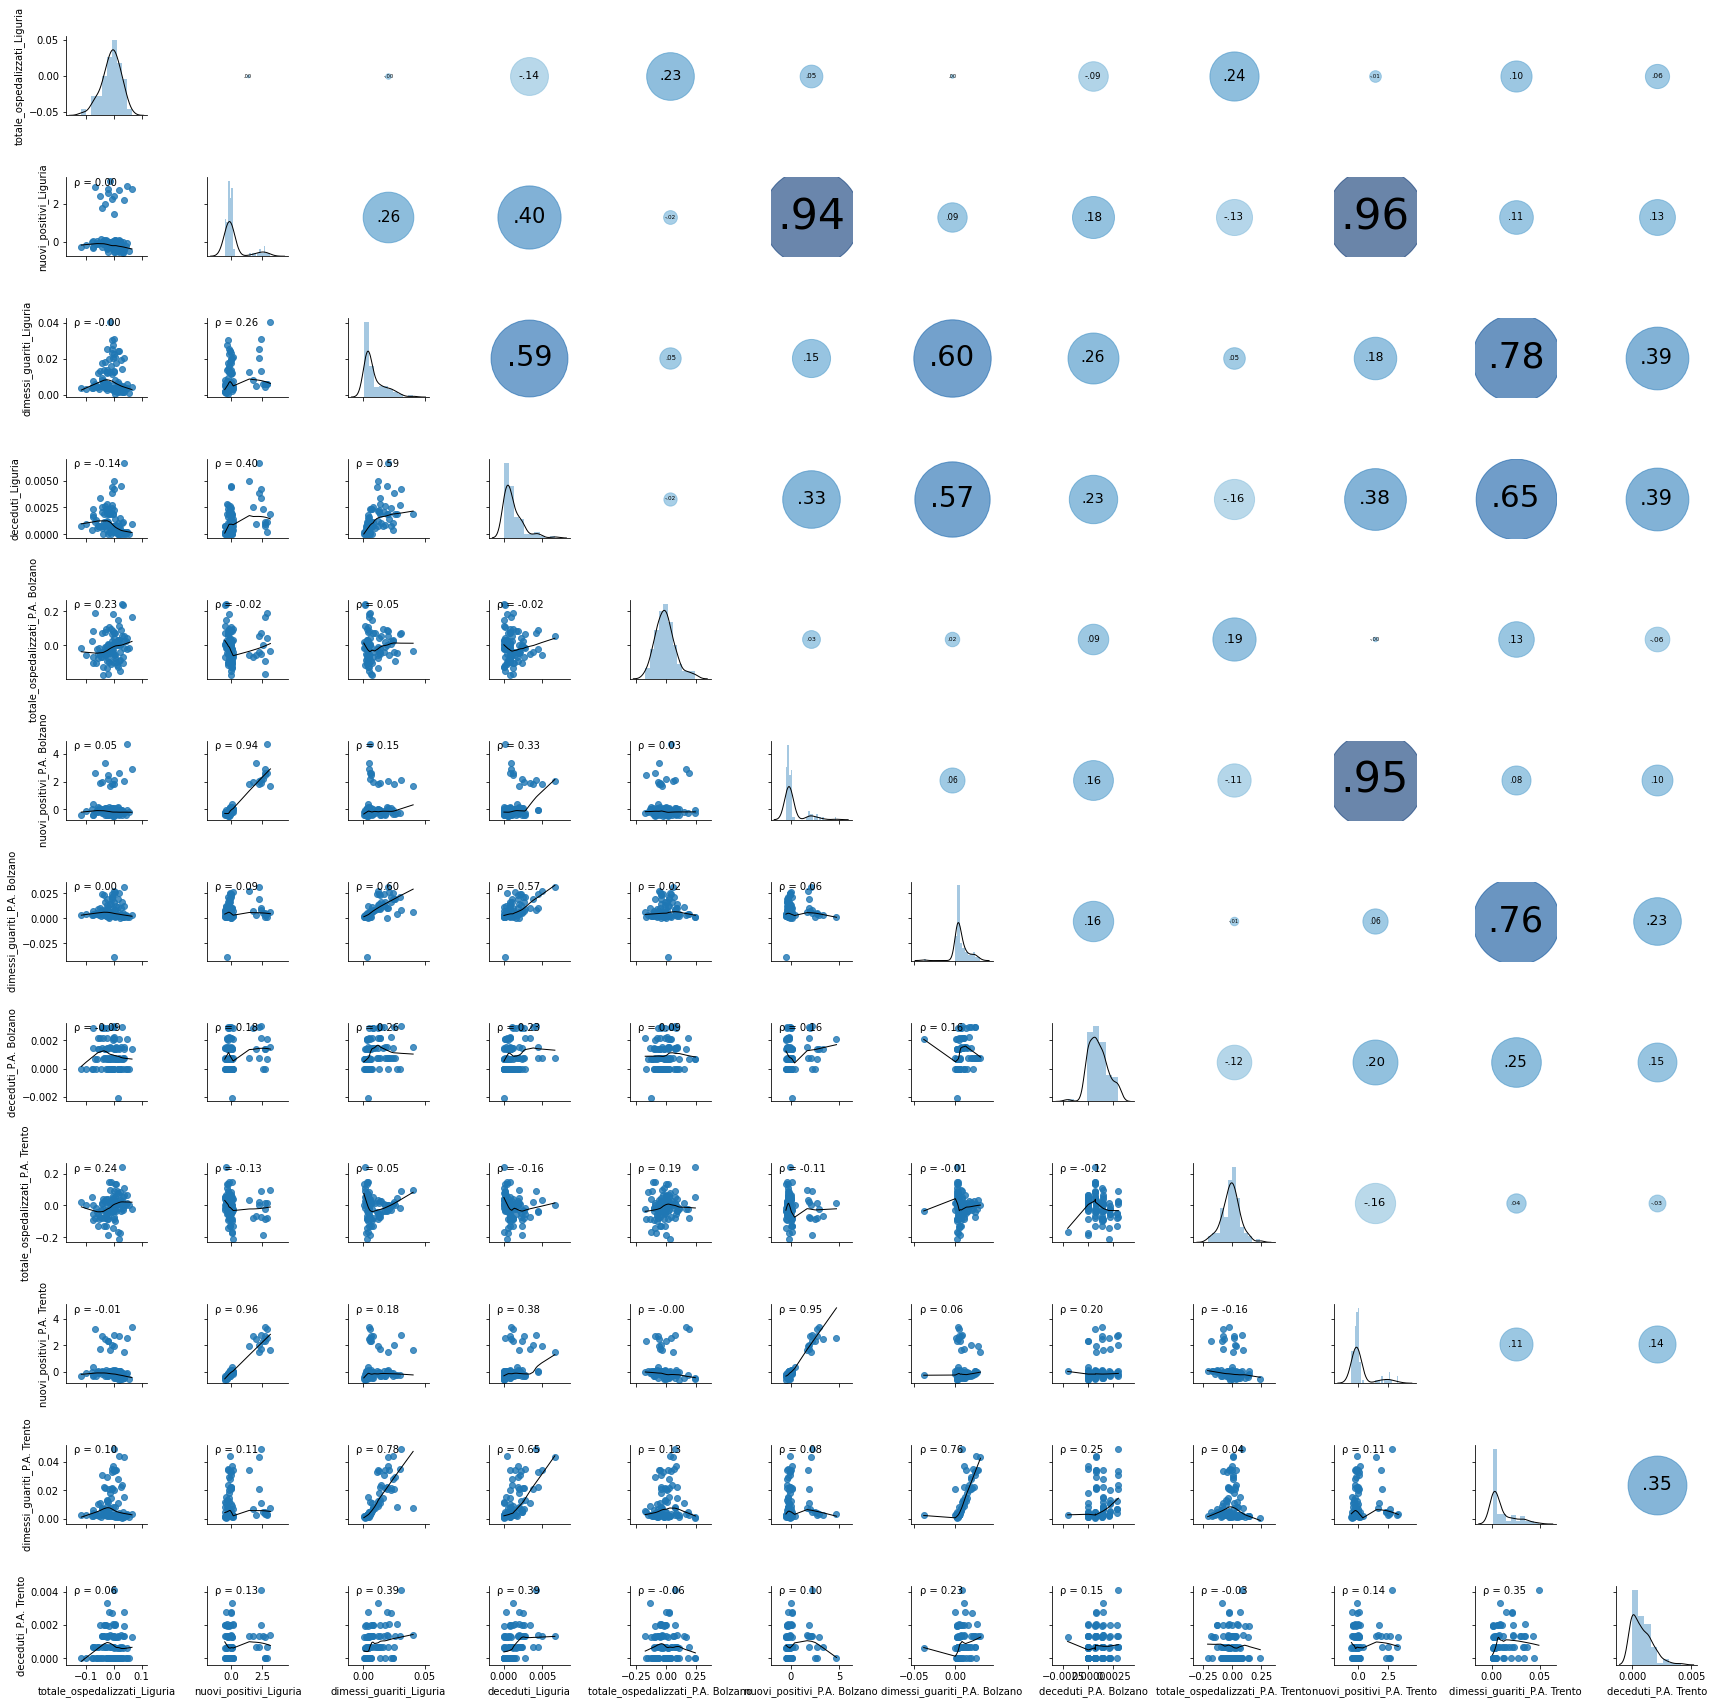

In [33]:
#Correlation pct_change
g = sns.PairGrid(pct_change.dropna(), aspect=1, height = 2, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureW

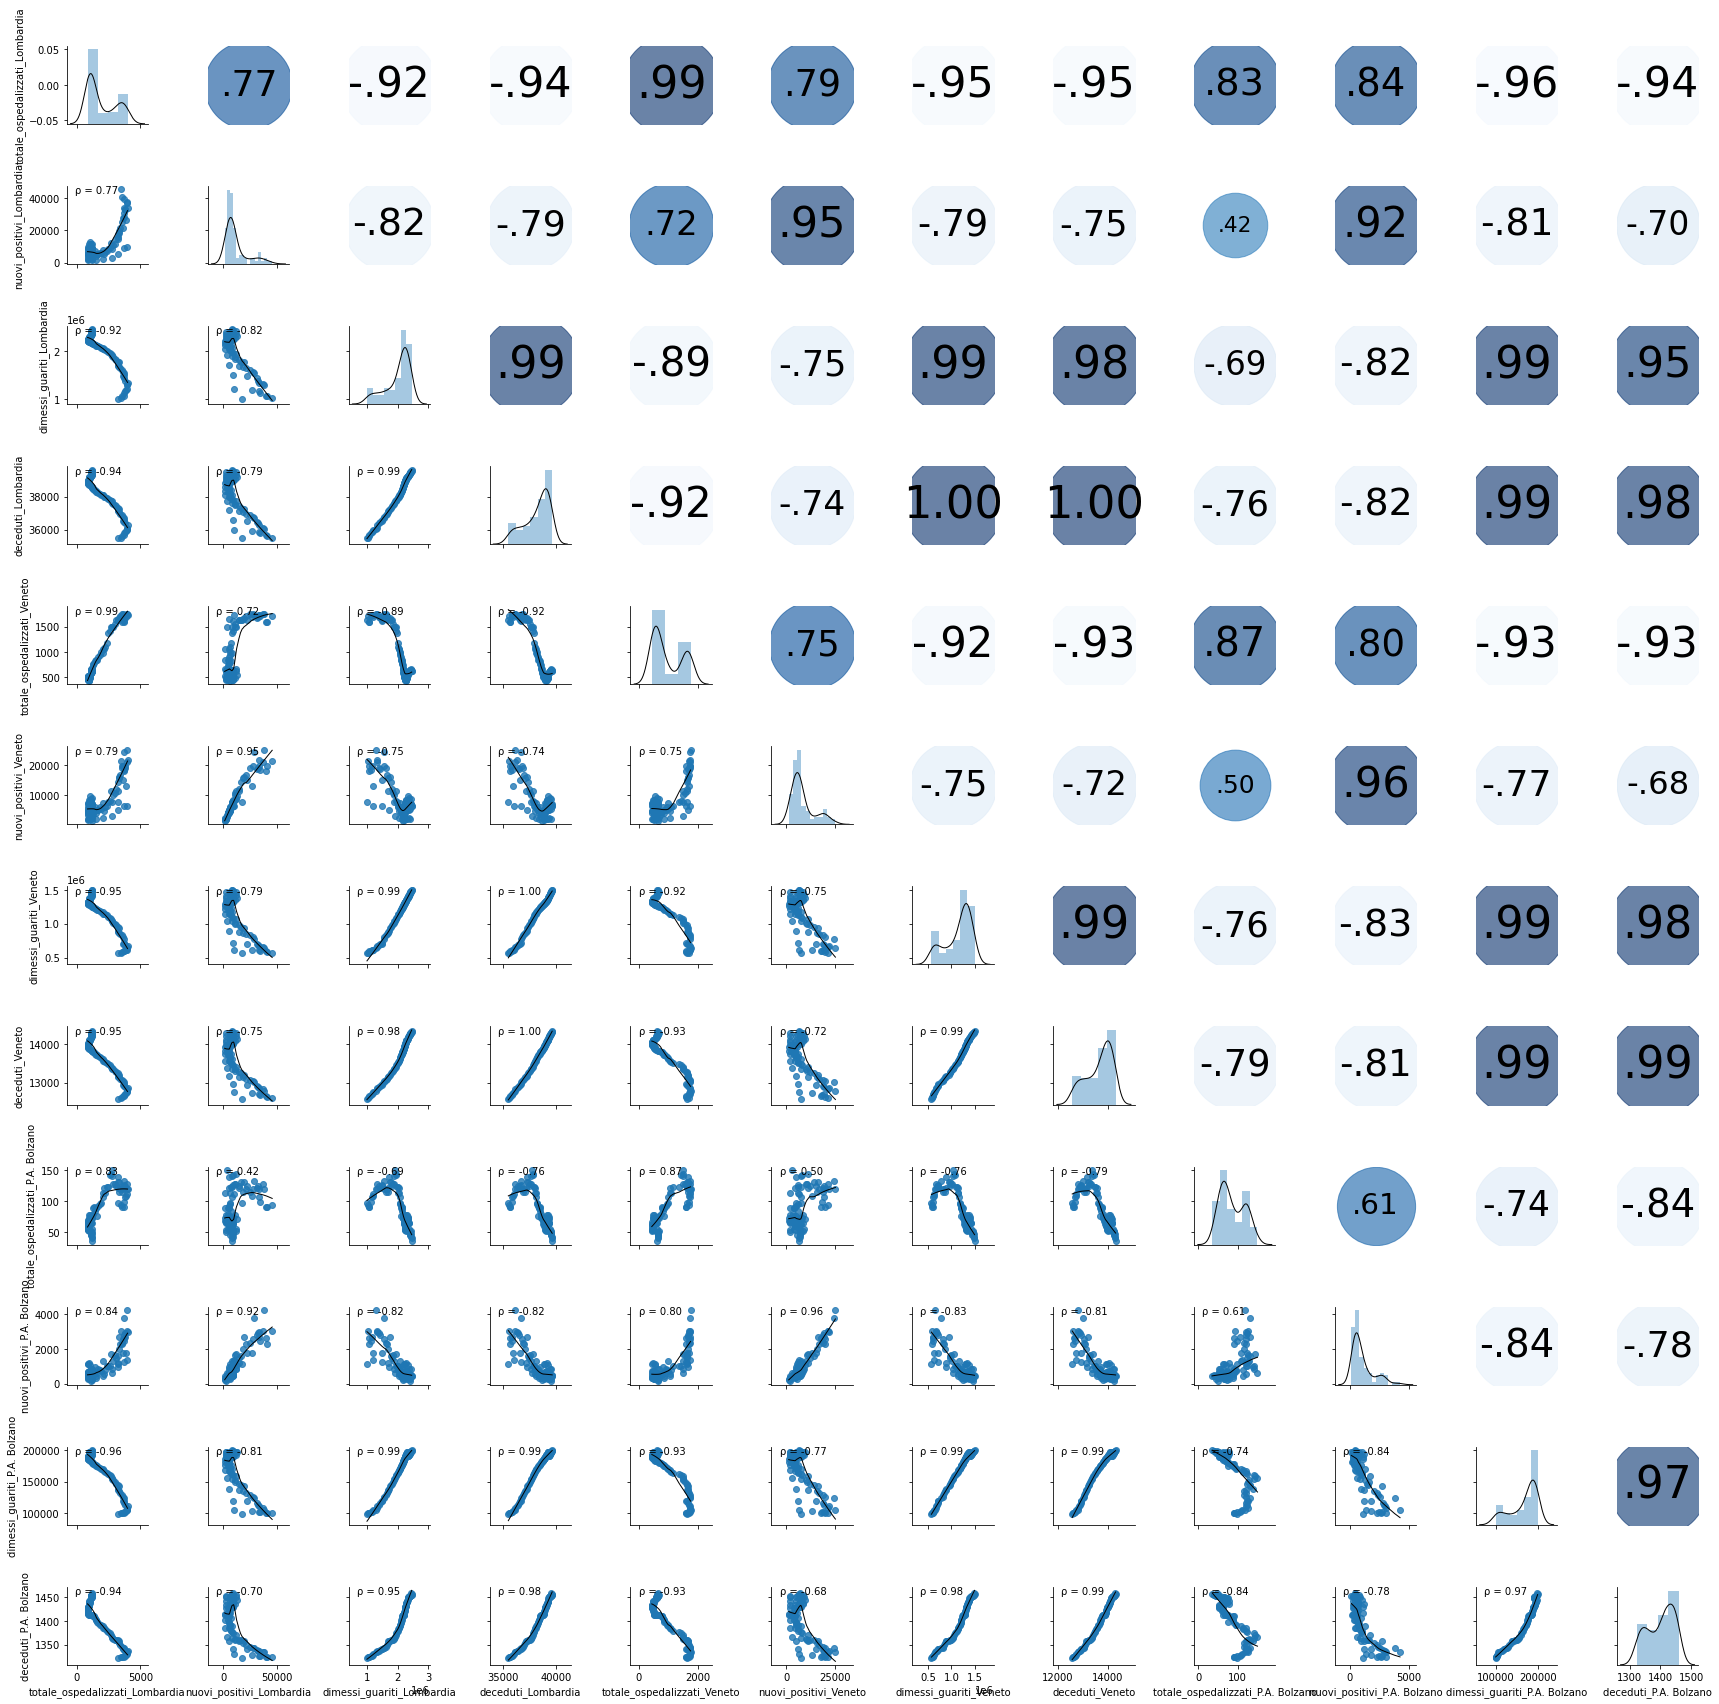

In [12]:
#Correlation original features
g = sns.PairGrid(confronto, aspect=1, height = 2, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()